In [1]:
# Nicholas Chow
# Helmut Strey
# BME 574
# HW - FFT De-noising

In [2]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\nicky\Documents\BME 574`


In [3]:
Pkg.add(["Random","Plots","FFTW"])

   Resolving package versions...
  No Changes to `C:\Users\nicky\Documents\BME 574\Project.toml`
  No Changes to `C:\Users\nicky\Documents\BME 574\Manifest.toml`


In [4]:
using Random, Plots, FFTW

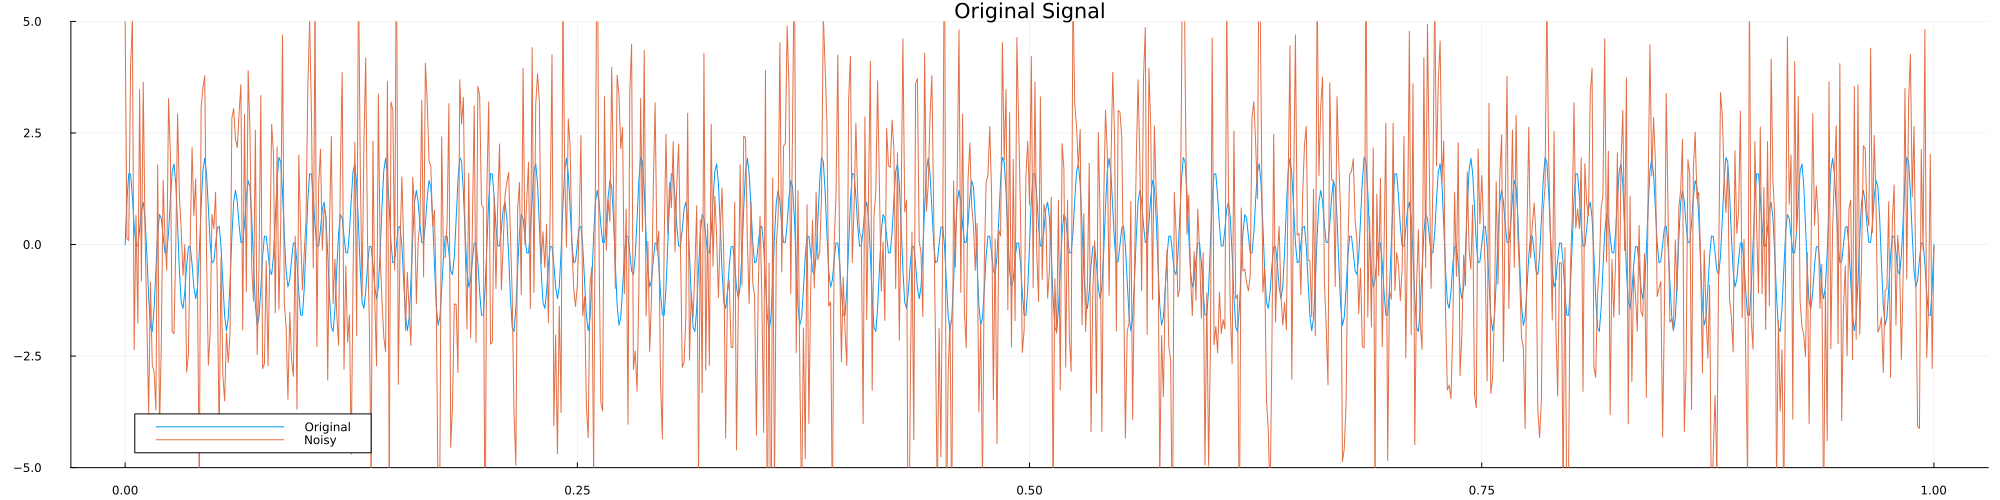

In [34]:
# generate clean signal and add noise
dt = 0.001
t = 0:dt:1
original = sin.(2*pi*50*t) + sin.(2*pi*120*t)
noisy = original + 2.5*randn(length(t))

# plot to visualize
plot(t,original,label="Original")
plot!(t,noisy,label="Noisy")
plot!(title="Original Signal",xlabel="Time (s)",ylabel="Amplitude",ylim=(-5,5),size=(2000,500))

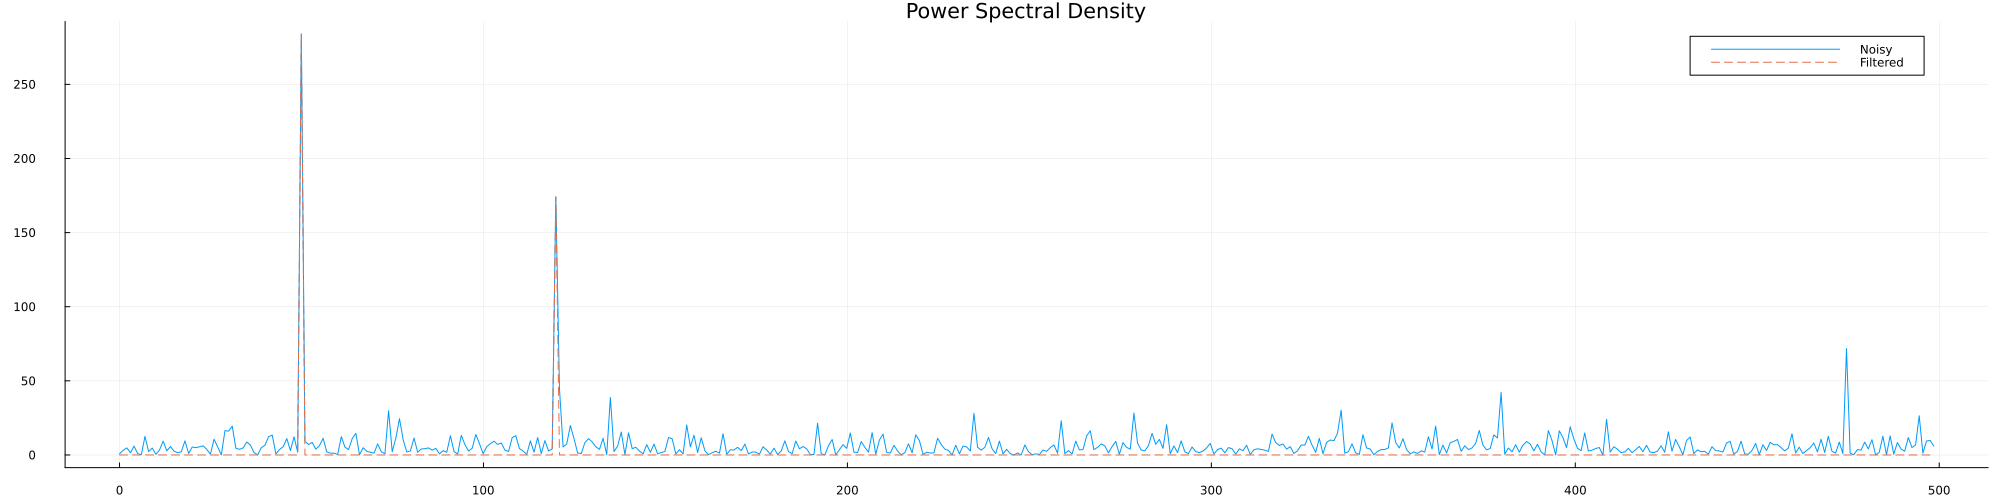

In [36]:
# compute the FFT
n = length(t)
fhat = fft(noisy)
PSD = abs.(fhat).^2/n
freq = (0:n-1)/(dt*n)

# find significant frequencies
L = 1:div(n,2)
indices = PSD .> 100
PSDclean = PSD .* indices
fhat_filtered = fhat .* indices

# plot for visualization
plot(freq[L],PSD[L],label="Noisy")
plot!(freq[L],PSDclean[L],label="Filtered",linestyle=:dash)
plot!(title="Power Spectral Density",xlabel="Frequency (Hz)",ylabel="Power",size=(2000,500))

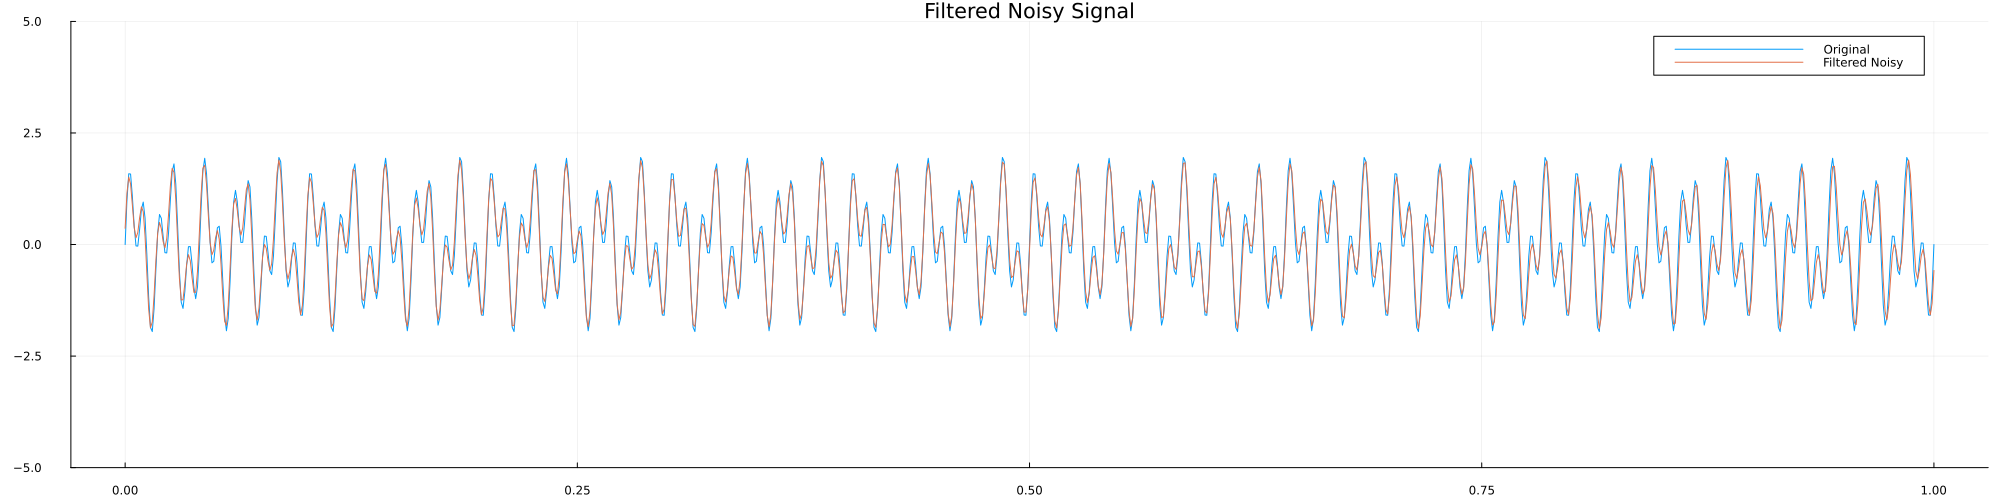

In [38]:
# compute inverse FFT for filtered signal
filtered = ifft(fhat_filtered)

# plot for visualization
plot(t,original,label="Original")
plot!(t,real(filtered),label="Filtered Noisy")
plot!(title="Filtered Noisy Signal",xlabel="Time (s)", ylabel="Amplitude",ylim=(-5,5),size=(2000,500))